In [ ]:
# MINOR PROJECT 2

In [ ]:
# USING HAAR CASCADE ALGORITHMS DETECTING THE FACE, SMILE AND EYES

In [ ]:
#ADDING LIBRARIES
import numpy as np
import cv2  #COMPUTER VISION
from google.colab.patches import cv2_imshow

In [ ]:
#WORKING WITH IMAGES

In [ ]:
#downloading the image and saving the file under p1.jpg

In [ ]:
!wget https://static5.depositphotos.com/1037987/482/i/950/depositphotos_4822317-stock-photo-grandparents-with-adult-children-in.jpg -O p1.jpg

--2023-07-05 12:24:24--  https://static5.depositphotos.com/1037987/482/i/950/depositphotos_4822317-stock-photo-grandparents-with-adult-children-in.jpg
Resolving static5.depositphotos.com (static5.depositphotos.com)... 23.48.180.199
Connecting to static5.depositphotos.com (static5.depositphotos.com)|23.48.180.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 127682 (125K) [image/jpeg]
Saving to: ‘p1.jpg’

p1.jpg              100%[===================>] 124.69K   258KB/s    in 0.5s    

2023-07-05 12:24:27 (258 KB/s) - ‘p1.jpg’ saved [127682/127682]



In [ ]:
img=cv2.imread("/content/p1.jpg")    #reading the given file and storing in a variable

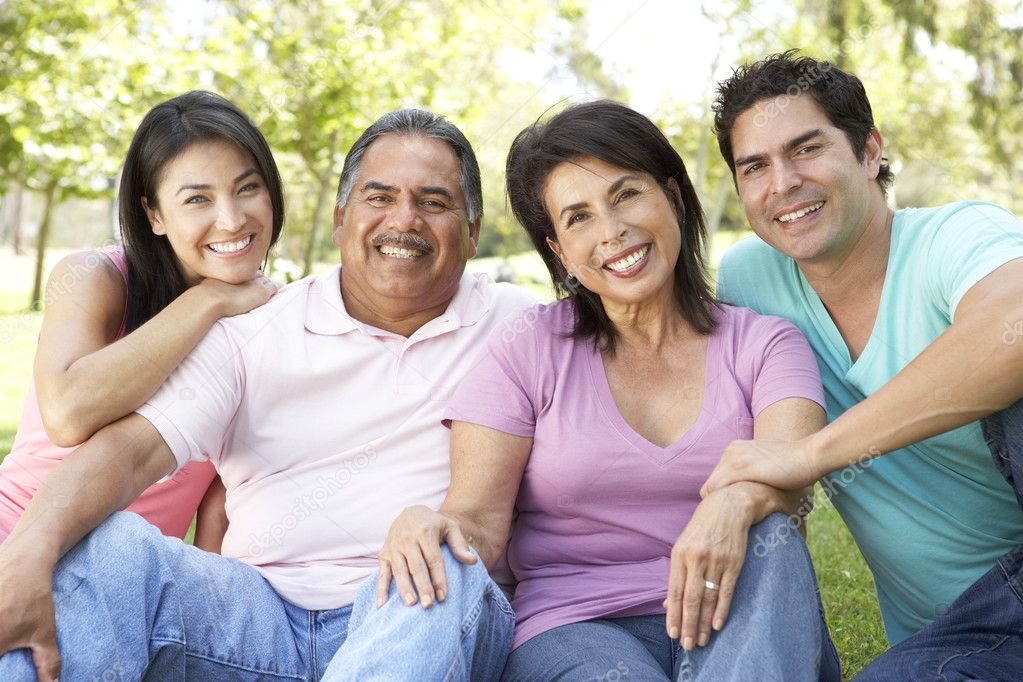

In [ ]:
cv2_imshow(img)   #image before face and eye detection

In [ ]:
img.shape

(682, 1023, 3)

In [ ]:
#saving the haarcascade algorithms face,eye,eye_glasses,license_plate and smile

In [ ]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2023-07-05 12:24:27--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.05s   

2023-07-05 12:24:28 (16.4 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [ ]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml

--2023-07-05 12:24:28--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341406 (333K) [text/plain]
Saving to: ‘haarcascade_eye.xml’

haarcascade_eye.xml 100%[===================>] 333.40K  --.-KB/s    in 0.04s   

2023-07-05 12:24:28 (8.17 MB/s) - ‘haarcascade_eye.xml’ saved [341406/341406]



In [ ]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_smile.xml

--2023-07-05 12:24:28--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_smile.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 188506 (184K) [text/plain]
Saving to: ‘haarcascade_smile.xml’

haarcascade_smile.x 100%[===================>] 184.09K  --.-KB/s    in 0.03s   

2023-07-05 12:24:29 (5.81 MB/s) - ‘haarcascade_smile.xml’ saved [188506/188506]



In [ ]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_license_plate_rus_16stages.xml

--2023-07-05 12:24:29--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_license_plate_rus_16stages.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47775 (47K) [text/plain]
Saving to: ‘haarcascade_license_plate_rus_16stages.xml’

haarcascade_license 100%[===================>]  46.66K  --.-KB/s    in 0.01s   

2023-07-05 12:24:29 (3.73 MB/s) - ‘haarcascade_license_plate_rus_16stages.xml’ saved [47775/47775]



In [ ]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye_tree_eyeglasses.xml

--2023-07-05 12:24:29--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye_tree_eyeglasses.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 601661 (588K) [text/plain]
Saving to: ‘haarcascade_eye_tree_eyeglasses.xml’

haarcascade_eye_tre 100%[===================>] 587.56K  --.-KB/s    in 0.05s   

2023-07-05 12:24:30 (11.3 MB/s) - ‘haarcascade_eye_tree_eyeglasses.xml’ saved [601661/601661]



In [ ]:
#detection of face and eyes

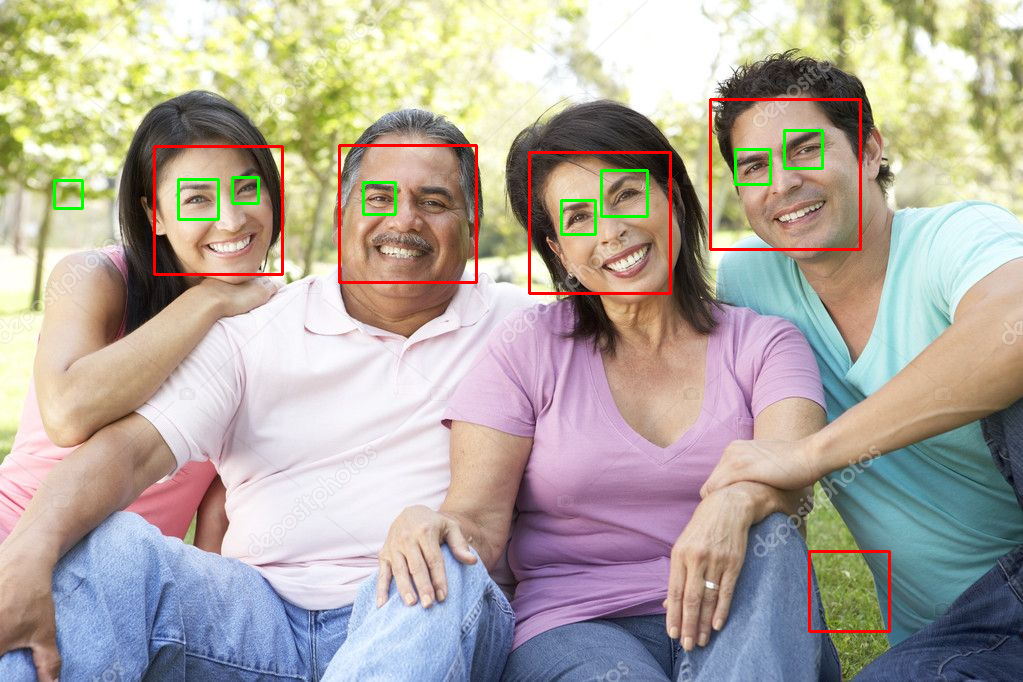

In [ ]:
img=cv2.imread("/content/p1.jpg")
model=cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml")
faces=model.detectMultiScale(img,1.2,5)
model_eye=cv2.CascadeClassifier("/content/haarcascade_eye.xml")
eyes=model_eye.detectMultiScale(img,1.1,5)
for x,y,w,h in eyes:
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
for x,y,w,h in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
cv2_imshow(img)

In [ ]:
faces

array([[710,  99, 150, 150],
       [154, 146, 128, 128],
       [339, 145, 137, 137],
       [529, 152, 141, 141],
       [809, 551,  80,  80]], dtype=int32)

In [ ]:
#downloading the image and saving under p2.jpg

In [ ]:
!wget https://sod.pixlab.io/images/otsu.jpg -O p2.jpg

--2023-07-05 12:24:31--  https://sod.pixlab.io/images/otsu.jpg
Resolving sod.pixlab.io (sod.pixlab.io)... 172.66.43.20, 172.66.40.236, 2606:4700:3108::ac42:28ec, ...
Connecting to sod.pixlab.io (sod.pixlab.io)|172.66.43.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73112 (71K) [image/jpeg]
Saving to: ‘p2.jpg’

p2.jpg              100%[===================>]  71.40K  --.-KB/s    in 0.004s  

2023-07-05 12:24:32 (15.7 MB/s) - ‘p2.jpg’ saved [73112/73112]



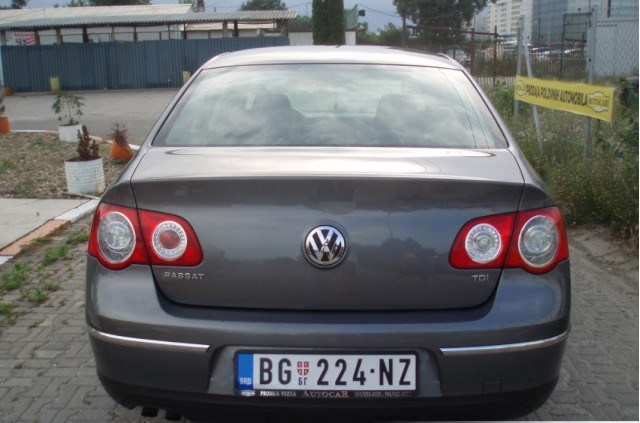

In [ ]:
pic=cv2.imread("/content/p2.jpg")     #reading the file and storing in a variable
cv2_imshow(pic)         #picture before license_detection

In [ ]:
#detecting license plate

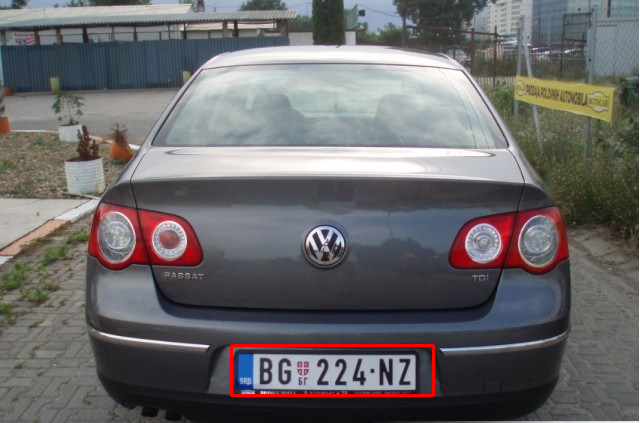

In [ ]:
mod=cv2.CascadeClassifier("/content/haarcascade_license_plate_rus_16stages.xml")
license_plate=mod.detectMultiScale(pic,1.1,2)
for x,y,w,h in license_plate:
  cv2.rectangle(pic,(x,y),(x+w,y+h),(0,0,255),2)
cv2_imshow(pic)                                                   #picture after license detection

In [ ]:
# downloading the image and saving under p3.jpg

In [ ]:
!wget https://www.shutterstock.com/image-photo/portrait-couple-wearing-glasses-studio-260nw-432277546.jpg -O p3.jpg

--2023-07-05 12:24:32--  https://www.shutterstock.com/image-photo/portrait-couple-wearing-glasses-studio-260nw-432277546.jpg
Resolving www.shutterstock.com (www.shutterstock.com)... 13.35.166.88, 13.35.166.76, 13.35.166.120, ...
Connecting to www.shutterstock.com (www.shutterstock.com)|13.35.166.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27820 (27K) [image/jpeg]
Saving to: ‘p3.jpg’

p3.jpg              100%[===================>]  27.17K  --.-KB/s    in 0s      

2023-07-05 12:24:33 (233 MB/s) - ‘p3.jpg’ saved [27820/27820]



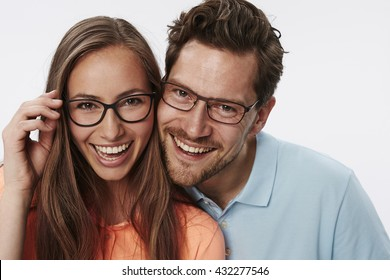

In [ ]:
photo=cv2.imread("/content/p3.jpg")            #reading the file and storing in a variable
cv2_imshow(photo)      # image before eye_glasses detection

In [ ]:
#detecting eye_glasses

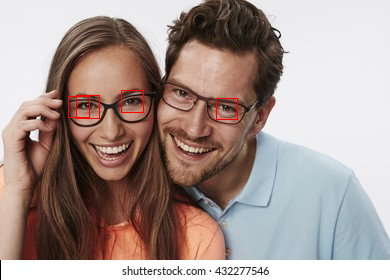

In [ ]:
photo=cv2.imread("/content/p3.jpg")
model_eyeglasses=cv2.CascadeClassifier("/content/haarcascade_eye_tree_eyeglasses.xml")
eye_glasses=model_eyeglasses.detectMultiScale(photo,1.1,1)
for x,y,w,h in eye_glasses:
  cv2.rectangle(photo,(x,y),(x+w,y+h),(0,0,255),1)
cv2_imshow(photo)                        #image after eye_glasses detecction

In [ ]:
#downloading the image and saving it under p5.jpg

In [ ]:
!wget https://wpcdn.us-east-1.vip.tn-cloud.net/www.pittsburghparent.com/content/uploads/data-import/329a3188/background-of-people-smiling-4184-1024x490.jpg -O p5.jpg

--2023-07-05 12:24:33--  https://wpcdn.us-east-1.vip.tn-cloud.net/www.pittsburghparent.com/content/uploads/data-import/329a3188/background-of-people-smiling-4184-1024x490.jpg
Resolving wpcdn.us-east-1.vip.tn-cloud.net (wpcdn.us-east-1.vip.tn-cloud.net)... 104.17.50.20, 104.17.49.20
Connecting to wpcdn.us-east-1.vip.tn-cloud.net (wpcdn.us-east-1.vip.tn-cloud.net)|104.17.50.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74151 (72K) [image/jpeg]
Saving to: ‘p5.jpg’

p5.jpg              100%[===================>]  72.41K  --.-KB/s    in 0.004s  

2023-07-05 12:24:34 (17.3 MB/s) - ‘p5.jpg’ saved [74151/74151]



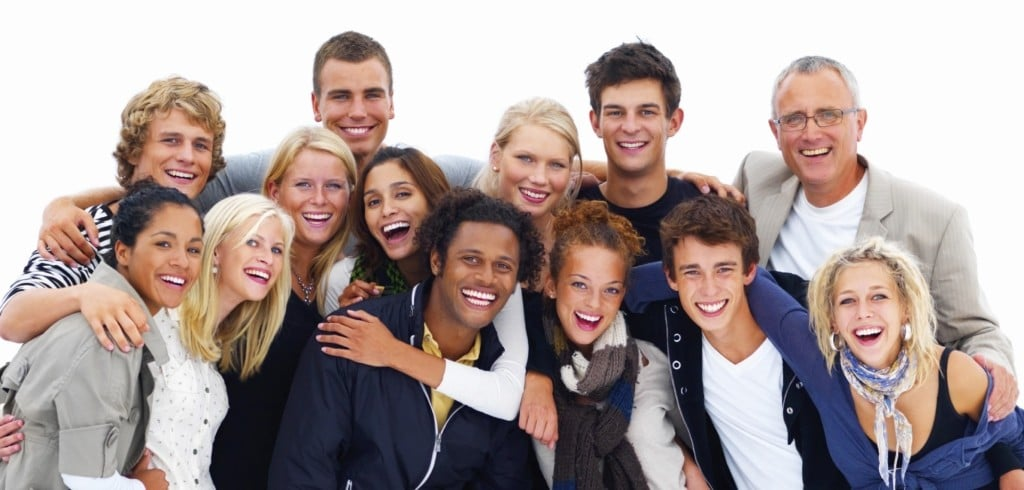

In [ ]:
p=cv2.imread("/content/p5.jpg")
cv2_imshow(p)       #image before smile detection

In [ ]:
# detecting smile

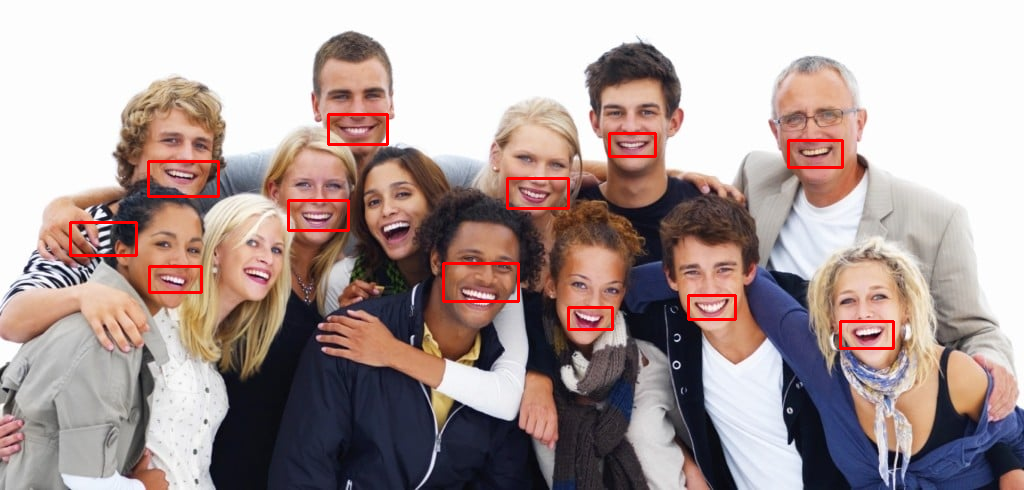

In [ ]:
p=cv2.imread("/content/p5.jpg")
model_smile=cv2.CascadeClassifier("/content/haarcascade_smile.xml")
smile=model_smile.detectMultiScale(p,1.1,55)
for x,y,w,h in smile:
  cv2.rectangle(p,(x,y),(x+w,y+h),(0,0,255),2)
cv2_imshow(p)                             #image after smile detection

In [ ]:
!pip install nbconvert

In [ ]:
! jupyter nbconvert --to html Minor_Project_2.ipynb

[NbConvertApp] Converting notebook Minor_Project_2.ipynb to html
[NbConvertApp] Writing 6302699 bytes to Minor_Project_2.html
